# STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# STEP 2: Load Dataset

In [5]:
data = {
    "Route": ["Route A", "Route A", "Route B", "Route B"],
    "Scheduled_Time": ["08:00", "09:00", "08:30", "09:30"],
    "Actual_Time": ["08:10", "09:05", "08:50", "09:40"]
}

df = pd.DataFrame(data)

df.to_csv("public_transport_data.csv", index=False)


# STEP 3: Initial Inspection

In [6]:
print(df.head())

     Route Scheduled_Time Actual_Time
0  Route A          08:00       08:10
1  Route A          09:00       09:05
2  Route B          08:30       08:50
3  Route B          09:30       09:40


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Route           4 non-null      object
 1   Scheduled_Time  4 non-null      object
 2   Actual_Time     4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes
None


In [8]:
print(df.isnull().sum())

Route             0
Scheduled_Time    0
Actual_Time       0
dtype: int64


# STEP 4: Data Cleaning

In [9]:
# Convert time columns to datetime
df['Scheduled_Time'] = pd.to_datetime(df['Scheduled_Time'])
df['Actual_Time'] = pd.to_datetime(df['Actual_Time'])

C:\Users\choice laptops\AppData\Local\Temp\ipykernel_9356\3474807119.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled_Time'] = pd.to_datetime(df['Scheduled_Time'])
C:\Users\choice laptops\AppData\Local\Temp\ipykernel_9356\3474807119.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Actual_Time'] = pd.to_datetime(df['Actual_Time'])


In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

In [11]:
print(df.head())

     Route      Scheduled_Time         Actual_Time
0  Route A 2026-01-28 08:00:00 2026-01-28 08:10:00
1  Route A 2026-01-28 09:00:00 2026-01-28 09:05:00
2  Route B 2026-01-28 08:30:00 2026-01-28 08:50:00
3  Route B 2026-01-28 09:30:00 2026-01-28 09:40:00


# STEP 5: Calculate Delay (in minutes)

In [12]:
df['Delay_Minutes'] = (df['Actual_Time'] - df['Scheduled_Time']).dt.total_seconds() / 60

In [13]:
print(df.head())

     Route      Scheduled_Time         Actual_Time  Delay_Minutes
0  Route A 2026-01-28 08:00:00 2026-01-28 08:10:00           10.0
1  Route A 2026-01-28 09:00:00 2026-01-28 09:05:00            5.0
2  Route B 2026-01-28 08:30:00 2026-01-28 08:50:00           20.0
3  Route B 2026-01-28 09:30:00 2026-01-28 09:40:00           10.0


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Route           4 non-null      object        
 1   Scheduled_Time  4 non-null      datetime64[ns]
 2   Actual_Time     4 non-null      datetime64[ns]
 3   Delay_Minutes   4 non-null      float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 260.0+ bytes
None



# STEP 6: Exploratory Data Analysis


In [15]:
route_delay = df.groupby('Route')['Delay_Minutes'].mean()

In [16]:
print(route_delay)

Route
Route A     7.5
Route B    15.0
Name: Delay_Minutes, dtype: float64


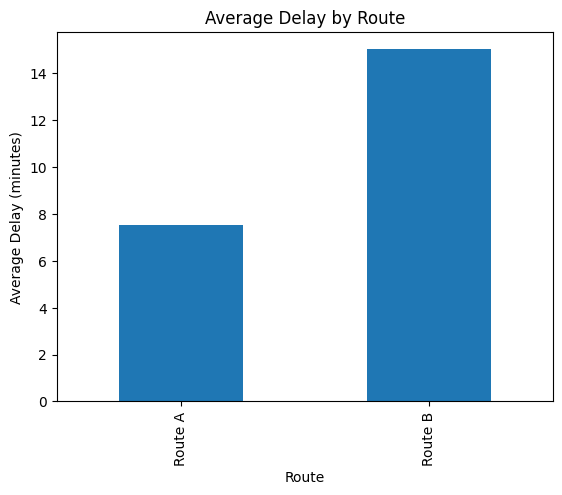

In [17]:
# Bar chart: Average delay per route
plt.figure()
route_delay.plot(kind='bar')
plt.title("Average Delay by Route")
plt.xlabel("Route")
plt.ylabel("Average Delay (minutes)")
plt.show()

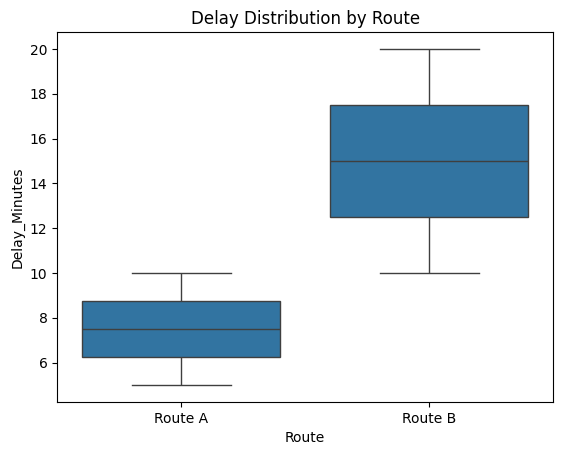

In [18]:

# Box plot: Delay distribution by route
plt.figure()
sns.boxplot(x='Route', y='Delay_Minutes', data=df)
plt.title("Delay Distribution by Route")
plt.show()

# STEP 7: Statistical Test (t-test)

In [20]:
# Compare delays between two routes (example: Route A and Route B)
route_a = df[df['Route'] == 'Route A']['Delay_Minutes']
route_b = df[df['Route'] == 'Route B']['Delay_Minutes']

In [21]:

t_stat, p_value = ttest_ind(route_a, route_b, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.3416407864998738
P-value: 0.3498855927709402


In [24]:
print(df.head())

     Route      Scheduled_Time         Actual_Time  Delay_Minutes
0  Route A 2026-01-28 08:00:00 2026-01-28 08:10:00           10.0
1  Route A 2026-01-28 09:00:00 2026-01-28 09:05:00            5.0
2  Route B 2026-01-28 08:30:00 2026-01-28 08:50:00           20.0
3  Route B 2026-01-28 09:30:00 2026-01-28 09:40:00           10.0


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Route           4 non-null      object        
 1   Scheduled_Time  4 non-null      datetime64[ns]
 2   Actual_Time     4 non-null      datetime64[ns]
 3   Delay_Minutes   4 non-null      float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 260.0+ bytes
None


# STEP 8: Interpretation

In [22]:
if p_value < 0.05:
    print("There is a statistically significant difference in delays between the routes.")
else:
    print("There is no statistically significant difference in delays between the routes.")

There is no statistically significant difference in delays between the routes.
